In [1]:
# fetch ohlc data from binance for ADAUSDT and plot it on a candlestick chart.
import pandas as pd
import mplfinance as mpf
import requests

In [5]:
# fetch data from binance
url = 'https://api.binance.com/api/v3/klines?symbol=ADAUSDT&interval=1m&limit=50'
data = requests.get(url).json()
df = pd.DataFrame(data)
df.columns = ['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore']
df = df[['open_time', 'open', 'high', 'low', 'close', 'volume']]
df['open_time'] = pd.to_datetime(df['open_time'], unit='ms')
df.set_index('open_time', inplace=True)
df = df.astype(float)

In [6]:
print(df)

                       open    high     low   close     volume
open_time                                                     
2023-03-03 01:02:00  0.3483  0.3484  0.3481  0.3482    55086.8
2023-03-03 01:03:00  0.3481  0.3482  0.3480  0.3482    12628.4
2023-03-03 01:04:00  0.3483  0.3484  0.3483  0.3483      672.6
2023-03-03 01:05:00  0.3484  0.3485  0.3479  0.3479    44843.5
2023-03-03 01:06:00  0.3479  0.3480  0.3476  0.3476    22811.1
2023-03-03 01:07:00  0.3477  0.3479  0.3477  0.3479    42260.2
2023-03-03 01:08:00  0.3479  0.3479  0.3476  0.3479    12554.5
2023-03-03 01:09:00  0.3478  0.3479  0.3476  0.3478    18566.7
2023-03-03 01:10:00  0.3478  0.3479  0.3478  0.3479     8574.1
2023-03-03 01:11:00  0.3479  0.3479  0.3475  0.3476    76913.8
2023-03-03 01:12:00  0.3477  0.3479  0.3476  0.3478    25482.5
2023-03-03 01:13:00  0.3479  0.3479  0.3478  0.3479     1469.3
2023-03-03 01:14:00  0.3478  0.3479  0.3477  0.3477     3129.6
2023-03-03 01:15:00  0.3477  0.3479  0.3477  0.3477    

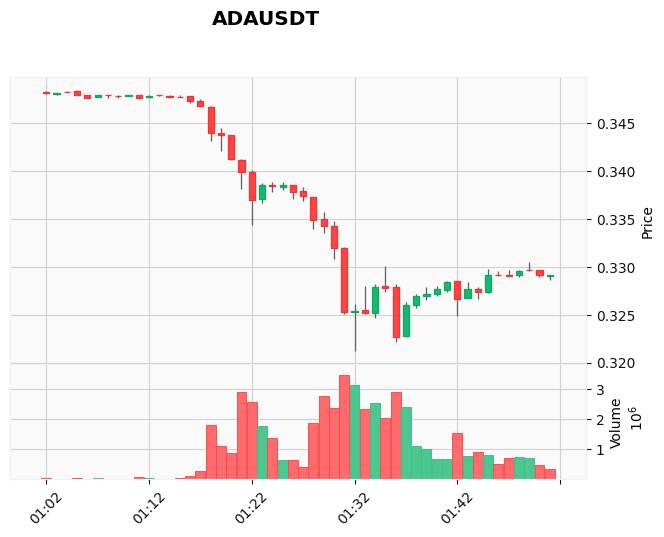

In [7]:
mpf.plot(df, type='candle', style='yahoo', volume=True, title='ADAUSDT', ylabel='Price', ylabel_lower='Volume')